<a href="https://colab.research.google.com/github/Panos1992/NetLoad_Optimization_residential/blob/main/NetLoad_BATCap_Parametric_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# Change to your desired directory
#desired_path = '/content/'
desired_path = '/content/drive/MyDrive/Housing_data'
os.chdir(desired_path)
# Verify the current working directory
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  /content/drive/MyDrive/Housing_data


In [4]:
# Define the file path
#File = 'Data_Households_SmartPV'
#File = 'Average_household_energy'

#avg_energy_df = pd.read_csv('Average_household_energy.csv')
raw_df = pd.read_csv('Data_Households_SmartPV.csv')

raw_df['Timestamp'] = pd.to_datetime(raw_df['Timestamp'])
raw_df .info()
print(raw_df.head())  # This will print the first 5 rows of the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187562 entries, 0 to 1187561
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Timestamp    1187562 non-null  datetime64[ns]
 1   NM_meter     1187562 non-null  int64         
 2   Import       1187562 non-null  float64       
 3   Export       1187562 non-null  float64       
 4   PV_meter     1187562 non-null  int64         
 5   Production   1187562 non-null  float64       
 6   Consumption  1187562 non-null  float64       
 7   NetLoad      1187562 non-null  float64       
 8   day          1187562 non-null  int64         
 9   day_of_week  1187562 non-null  int64         
 10  month        1187562 non-null  int64         
 11  year         1187562 non-null  int64         
 12  hour_of_day  1187562 non-null  int64         
 13  quarter      1187562 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(8)
memory usage: 126.8 MB


# Data Pre-Processing and plotting
Make the appropriate dataframes
and get the selected arrays

We can take average data or aggregated,
or even individual house, as case study




In [5]:
### Yearly Average Energy
yearly_avg_df = raw_df.groupby(['Timestamp', 'month']).mean().reset_index()
#yearly_avg_f = raw_df.groupby(['Timestamp', 'month']).sum().reset_index()
yearly_avg_df.info()
yearly_avg_df.head()

### Monthly Avg
#monthly_df = raw_df.groupby(['month','PV_meter']).mean().reset_index()
monthly_df = raw_df.groupby(['month']).mean()
months_of_the_year = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
#print(months_of_the_year)

### Daily Avg
hourly_df = raw_df.groupby(['hour_of_day']).mean()

### Weekday / Weekend Avg
#raw_df2 = raw_df
#raw_df2['day_type'] = raw_df2['Timestamp'].dt.dayofweek.apply(lambda x: 'Weekend' if x > 4 else 'Weekday')
#weekly_df = raw_df2.groupby(['quarter','day_type']).mean()
weekly_df = raw_df.groupby(['day_of_week']).mean()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
week = ["weekday","weekend"]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    17564 non-null  datetime64[ns]
 1   month        17564 non-null  int64         
 2   NM_meter     17564 non-null  float64       
 3   Import       17564 non-null  float64       
 4   Export       17564 non-null  float64       
 5   PV_meter     17564 non-null  float64       
 6   Production   17564 non-null  float64       
 7   Consumption  17564 non-null  float64       
 8   NetLoad      17564 non-null  float64       
 9   day          17564 non-null  float64       
 10  day_of_week  17564 non-null  float64       
 11  year         17564 non-null  float64       
 12  hour_of_day  17564 non-null  float64       
 13  quarter      17564 non-null  float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 1.9 MB


PLOTS

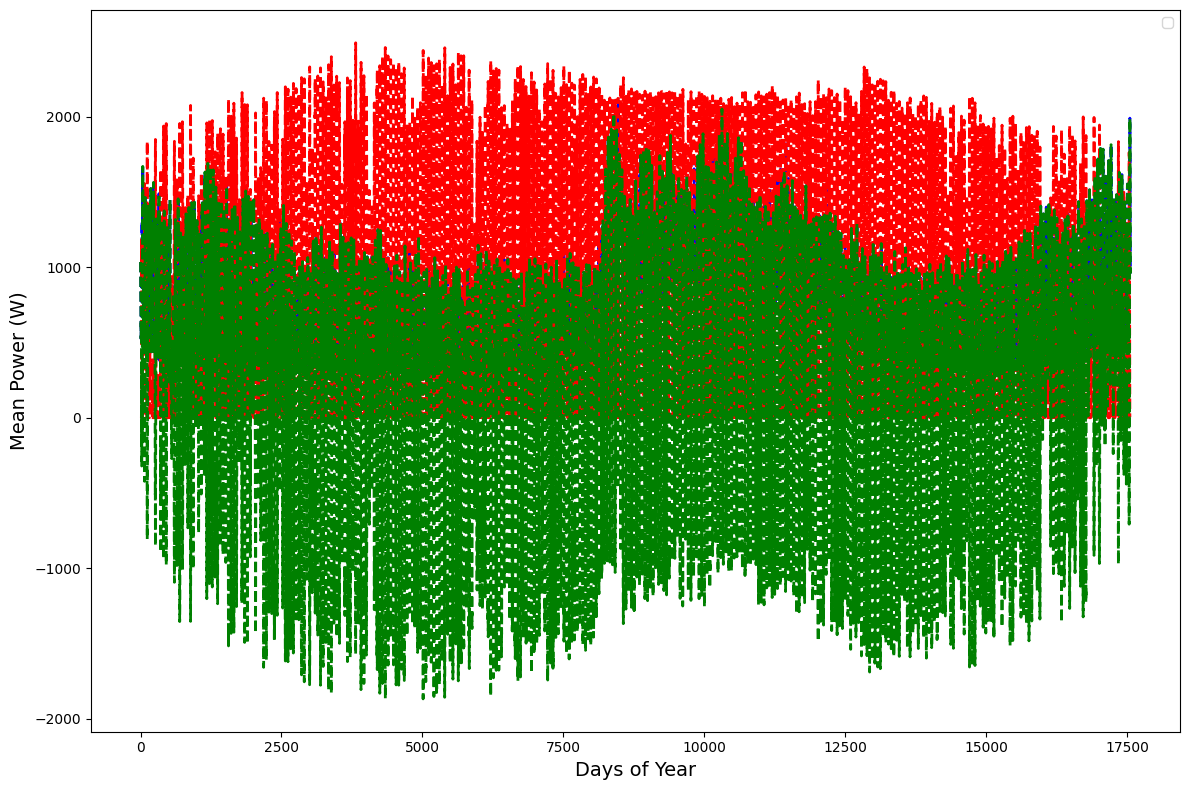

In [6]:
### Plot yearly
# Plot Prod, Cons and Net vs days
plt.figure(figsize=(12, 8))
plt.plot( yearly_avg_df['Consumption'], linestyle='--',linewidth=2, color='blue')
plt.plot( yearly_avg_df['Production'], linestyle='--',linewidth=2, color='red')
plt.plot( yearly_avg_df['NetLoad'],  linestyle='--',linewidth=2, color='green')

# Set the labels and title
plt.xlabel('Days of Year',  fontsize=14)
plt.ylabel('Mean Power (W)',  fontsize=14)
plt.legend( labels=['Consumption', 'Production', 'NetLoad'])
plt.legend()
plt.tight_layout()  # Auto-adjust layout to prevent clipping of labels

# Show the plot
plt.show()

<Axes: xlabel='month', ylabel='Consumption'>

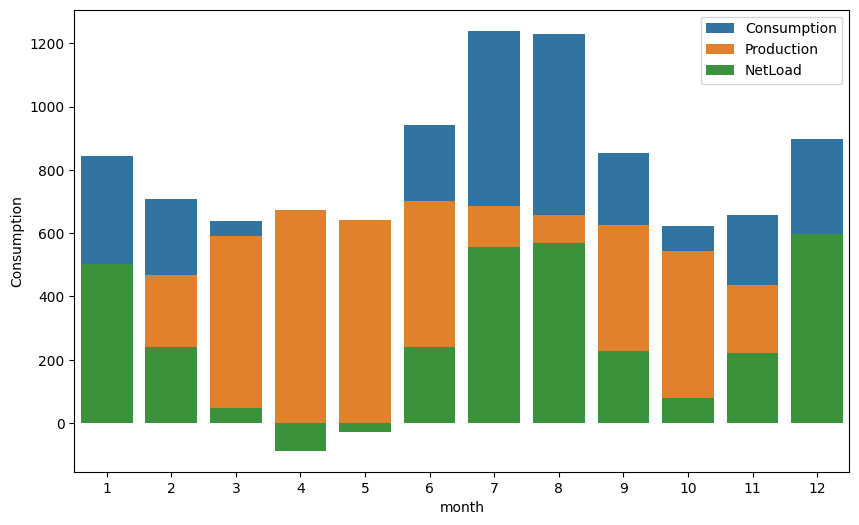

In [7]:
# Set the figure size
plt.figure(figsize=(10, 6))
# Create the bar plot
sns.barplot(x='month', y='Consumption', data=monthly_df, label='Consumption')
sns.barplot(x='month', y='Production', data=monthly_df, label='Production')
sns.barplot(x='month', y='NetLoad', data=monthly_df, label='NetLoad')


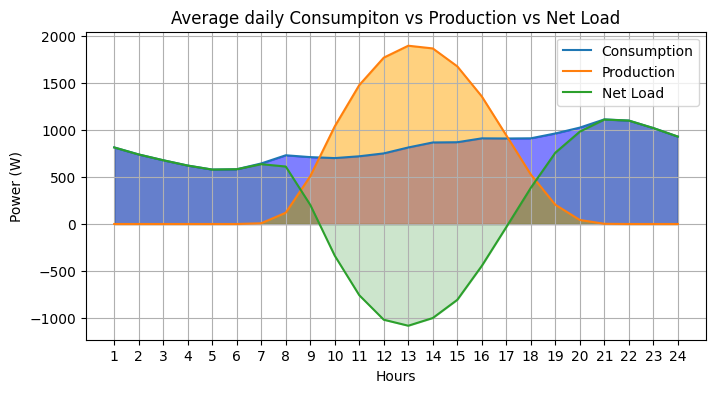

In [8]:
# Set the figure size
plt.figure(figsize=(8, 4))
hours = list(range(1, 25))

# Plot
plt.plot(hours, hourly_df['Consumption'], linestyle='-', label='Consumption')
plt.fill_between(hours, hourly_df['Consumption'], color='blue', alpha=0.5)  # Add shading under the Consumption curve

plt.plot(hours, hourly_df['Production'], linestyle='-', label='Production')
plt.fill_between(hours, hourly_df['Production'], color='orange', alpha=0.5)  # Add shading under the Production curve

plt.plot(hours, hourly_df['NetLoad'], linestyle='-', label='Net Load')
plt.fill_between(hours, hourly_df['NetLoad'], color='green', alpha=0.2)  # Add shading under the Net Load curve

# Set the labels and title
plt.xlabel('Hours'); plt.ylabel('Power (W)')
plt.title('Average daily Consumpiton vs Production vs Net Load')
plt.legend()
# Set custom x-axis tick labels
plt.xticks(hours);  plt.grid();
# Show the plot
plt.show();

week number: 29


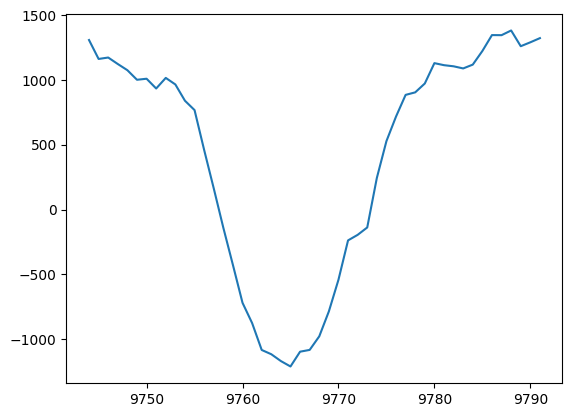

In [9]:
#Plot Net load in a random week / random day
import random
random_number = random.randint(1, 52)
print("week number:",random_number)

week_nr = random_number
#plt.plot(yearly_avg_df['Consumption'].iloc[48*7*week_nr:48*7*(week_nr+1)])

# plot a week
#plt.plot(yearly_avg_df['NetLoad'].iloc[48*7*week_nr:48*7*(week_nr+1)])
# plot a day
plt.plot(yearly_avg_df['NetLoad'].iloc[48*7*week_nr:48*7*week_nr+48])

In [10]:
## Get the daily data in array form
Production = hourly_df['Production'].values
Consumption = hourly_df['Consumption'].values
NetLoad =  hourly_df['NetLoad'].values


Interpolation for daytime. To add more points in the graph

In [11]:
##  Interpolation of Load
from scipy.interpolate import interp1d
# interpolate to get values for 1440 minutes/day (24 hours = 1440 minutes)
x = np.linspace(1,24,24)
v = Consumption
xq = np.linspace(1,24,24*60)
vq = np.interp(xq, x, v)
print(x)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24.]


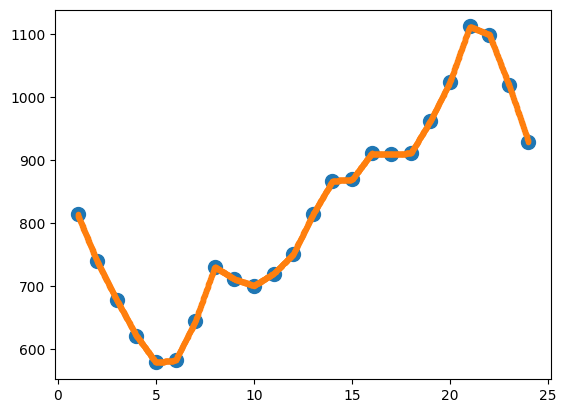

In [12]:
# Plot interpolated
plt.plot(x, v, 'o--',  label='Consumption',markersize=10 )
plt.plot(xq, vq,  '.-.', label='Interpolated')

# Load the dates

Load the dates

In [13]:
yearly_avg_df = yearly_avg_df.set_index('Timestamp')

In [14]:
# Get Specific Days data
#yearly_avg_df = yearly_avg_df.set_index('Timestamp')
yearly_avg_df.index = pd.to_datetime(yearly_avg_df.index)

# Filter for ONE specific days (Example: January 1st, 2016)
#specific_days_df = yearly_avg_df.loc[(yearly_avg_df.index.date == pd.to_datetime('2016-07-08').date())]

# Create a list of dates you want to filter
desired_dates = pd.to_datetime([
    '2016-07-08', '2016-07-09', '2016-07-10',
    '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14'
])

# Filter the DataFrame to only include these dates
specific_days_df = yearly_avg_df.loc[yearly_avg_df.index.normalize().isin(desired_dates)]

# CHANGE HOURLY DATA TO SPECIFIC DAY
#specific_days_df.index = pd.to_datetime(specific_days_df.index)
hourly_df = specific_days_df.resample('H').mean()
hourly_df.info()
hourly_df.tail(20)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2016-07-08 00:00:00 to 2016-07-14 23:00:00
Freq: H
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        168 non-null    float64
 1   NM_meter     168 non-null    float64
 2   Import       168 non-null    float64
 3   Export       168 non-null    float64
 4   PV_meter     168 non-null    float64
 5   Production   168 non-null    float64
 6   Consumption  168 non-null    float64
 7   NetLoad      168 non-null    float64
 8   day          168 non-null    float64
 9   day_of_week  168 non-null    float64
 10  year         168 non-null    float64
 11  hour_of_day  168 non-null    float64
 12  quarter      168 non-null    float64
dtypes: float64(13)
memory usage: 18.4 KB


,month,NM_meter,Import,Export,PV_meter,Production,Consumption,NetLoad,day,day_of_week,year,hour_of_day,quarter
Timestamp,,,,,,,,,,,,,
2016-07-14 04:00:00,7.0,614.941176,1260.560735,0.000000,586.632353,0.000000,1260.560735,1260.560735,14.0,3.0,2016.0,4.0,3.0
2016-07-14 05:00:00,7.0,614.941176,1180.538676,0.000000,586.632353,0.000221,1180.538897,1180.538676,14.0,3.0,2016.0,5.0,3.0
2016-07-14 06:00:00,7.0,614.941176,1168.551176,0.009265,586.632353,17.708088,1186.250000,1168.541912,14.0,3.0,2016.0,6.0,3.0
2016-07-14 07:00:00,7.0,614.941176,1002.800956,12.294118,586.632353,170.700515,1161.207353,990.506838,14.0,3.0,2016.0,7.0,3.0
2016-07-14 08:00:00,7.0,616.746269,620.470522,135.648582,588.000000,570.123209,1054.945149,484.821940,14.0,3.0,2016.0,8.0,3.0
2016-07-14 09:00:00,7.0,617.666667,306.312500,451.552500,589.000000,1106.135455,960.895455,-145.240000,14.0,3.0,2016.0,9.0,3.0
2016-07-14 10:00:00,7.0,615.820896,203.833507,834.999776,587.597015,1555.075597,923.909328,-631.166269,14.0,3.0,2016.0,10.0,3.0
2016-07-14 11:00:00,7.0,614.941176,139.652868,1143.564632,586.632353,1888.949779,885.038015,-1003.911765,14.0,3.0,2016.0,11.0,3.0
2016-07-14 12:00:00,7.0,614.941176,196.685000,1178.922647,586.632353,2093.621838,1111.384191,-982.237647,14.0,3.0,2016.0,12.0,3.0


In [108]:

#### Loading the results from the DRanalysis
results = pd.read_csv('DR_optim_results.csv')
results.info()
results.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8784 non-null   int64  
 1   Cons_new       8784 non-null   float64
 2   P_PV_used      8784 non-null   float64
 3   P_PV_used_new  8784 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 274.6 KB


,Unnamed: 0,Cons_new,P_PV_used,P_PV_used_new
0,0,770.835471,0.0,0.0
1,1,740.425941,0.0,0.0
2,2,671.726824,0.0,0.0
3,3,555.007647,0.0,0.0
4,4,438.773294,0.0,0.0


In [109]:
### Load Data #####
# For two summer days (peak production)
#hourly_df = hourly_df.reset_index()

# For whole year
hourly_df = yearly_avg_df.resample('H').mean().fillna(hourly_df.mean()).reset_index()

Production = hourly_df['Production']
#Consumption = hourly_df['Consumption']
Consumption = results['Cons_new']           # Load the DR optimized Consumption

NetLoad =  hourly_df['NetLoad']

timestamp = hourly_df['Timestamp'].copy();
hourly_df.head()


,Timestamp,month,NM_meter,Import,Export,PV_meter,Production,Consumption,NetLoad,day,day_of_week,year,hour_of_day,quarter
0,2016-01-01 00:00:00,1.0,614.941176,963.544338,0.0,586.632353,0.0,963.544338,963.544338,1.0,4.0,2016.0,0.0,1.0
1,2016-01-01 01:00:00,1.0,614.941176,925.532426,0.0,586.632353,0.0,925.532426,925.532426,1.0,4.0,2016.0,1.0,1.0
2,2016-01-01 02:00:00,1.0,614.941176,839.658529,0.0,586.632353,0.0,839.658529,839.658529,1.0,4.0,2016.0,2.0,1.0
3,2016-01-01 03:00:00,1.0,614.941176,693.759559,0.0,586.632353,0.0,693.759559,693.759559,1.0,4.0,2016.0,3.0,1.0
4,2016-01-01 04:00:00,1.0,614.941176,548.466618,0.0,586.632353,0.0,548.466618,548.466618,1.0,4.0,2016.0,4.0,1.0


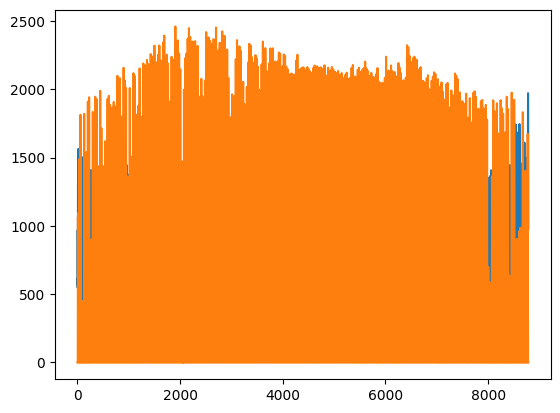

In [17]:
hours = len(Production)
timeframe = np.linspace(0,hours-1,hours)
plt.plot(timeframe, Consumption);
plt.plot(timeframe, Production);

In [18]:
print(hourly_df.isna().sum())


Timestamp      0
month          0
NM_meter       0
Import         0
Export         0
PV_meter       0
Production     0
Consumption    0
NetLoad        0
day            0
day_of_week    0
year           0
hour_of_day    0
quarter        0
dtype: int64


In [19]:
index=Production.index
index

RangeIndex(start=0, stop=8784, step=1)

# Battery Parameters

Battery Data
 https://midsummerwholesale.co.uk/pdfs/se-solaredge-home-battery-low-voltage-datasheet-eng-row.pdf

https://natec.com/wp-content/uploads/2020/12/6020-0205-Datasheet-LG-Chem-RESU-10H-High-Voltage-400V-type-C-for-SMA.pdf


In [20]:
# Specify battery Parameters. Source
# https://midsummerwholesale.co.uk/pdfs/se-solaredge-home-battery-low-voltage-datasheet-eng-row.pdf


battery_capacity = 0.9*4600  # in Wh
max_charge_rate = 2800  # Max charge rate in W (power)
max_discharge_rate = 4000  # Max discharge rate in W (power)
soc_min = 0.1*battery_capacity  # Maximum Depth of Discharge 10%
battery_soc = soc_min  # Initial state of charge in Wh
eff = 0.98;  # Charge/discharge Efficiency of the battery


'''
# LG Resus 10H type-C
#https://natec.com/wp-content/uploads/2020/12/6020-0205-Datasheet-LG-Chem-RESU-10H-High-Voltage-400V-type-C-for-SMA.pdf
battery_capacity = 0.95*9800  # in Wh
max_charge_rate = 5000  # Max charge rate in W (power)
max_discharge_rate = 0.5*7000  # Max discharge rate in W (power)
soc_min = 0.05*battery_capacity  # Maximum Depth of Discharge 10%
battery_soc = soc_min  # Initial state of charge in Wh
eff = 0.98;  # Charge/discharge Efficiency of the battery
#
'''

'\n# LG Resus 10H type-C\n#https://natec.com/wp-content/uploads/2020/12/6020-0205-Datasheet-LG-Chem-RESU-10H-High-Voltage-400V-type-C-for-SMA.pdf\nbattery_capacity = 0.95*9800  # in Wh\nmax_charge_rate = 5000  # Max charge rate in W (power)\nmax_discharge_rate = 0.5*7000  # Max discharge rate in W (power)\nsoc_min = 0.05*battery_capacity  # Maximum Depth of Discharge 10%\nbattery_soc = soc_min  # Initial state of charge in Wh\neff = 0.98;  # Charge/discharge Efficiency of the battery\n#\n'

# Define tariffs data

Time-of-Use Tarriffs (Indicative)
TOU tarrifs from Australia 2017 from paper:

https://www.researchgate.net/publication/317125126_Leveraging_smart_meter_data_for_economic_optimization_of_residential_photovoltaics_under_existing_tariff_structures_and_incentive_schemes


In [100]:
#https://www.researchgate.net/publication/317125126_Leveraging_smart_meter_data_for_economic_optimization_of_residential_photovoltaics_under_existing_tariff_structures_and_incentive_schemes

# Sample TOU tariff data
tariff_data = {
    'time_period': pd.date_range(start='2016-07-08 00:00:00', end='2016-07-08 23:00:00', freq='H'),
   # Australian TOU tariffs
   # 'tariff_rate': [0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.53, 0.53, 0.53, 0.53, 0.53, 0.21, 0.21, 0.13, 0.13]

   # fixed tariffs AHK
    'tariff_rate':  [0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312, 0.312]

   # Variable tariffs AHK
   # 'tariff_rate':  [0.247, 0.247, 0.247, 0.247, 0.247, 0.247, 0.247, 0.247, 0.247, 0.267, 0.267, 0.267, 0.267, 0.267, 0.267, 0.267, 0.267, 0.267, 0.267, 0.267, 0.267, 0.267, 0.267, 0.247]
}

# Create the DataFrame
tariff_df = pd.DataFrame(tariff_data)
print(tariff_df )

           time_period  tariff_rate
0  2016-07-08 00:00:00        0.312
1  2016-07-08 01:00:00        0.312
2  2016-07-08 02:00:00        0.312
3  2016-07-08 03:00:00        0.312
4  2016-07-08 04:00:00        0.312
5  2016-07-08 05:00:00        0.312
6  2016-07-08 06:00:00        0.312
7  2016-07-08 07:00:00        0.312
8  2016-07-08 08:00:00        0.312
9  2016-07-08 09:00:00        0.312
10 2016-07-08 10:00:00        0.312
11 2016-07-08 11:00:00        0.312
12 2016-07-08 12:00:00        0.312
13 2016-07-08 13:00:00        0.312
14 2016-07-08 14:00:00        0.312
15 2016-07-08 15:00:00        0.312
16 2016-07-08 16:00:00        0.312
17 2016-07-08 17:00:00        0.312
18 2016-07-08 18:00:00        0.312
19 2016-07-08 19:00:00        0.312
20 2016-07-08 20:00:00        0.312
21 2016-07-08 21:00:00        0.312
22 2016-07-08 22:00:00        0.312
23 2016-07-08 23:00:00        0.312


In [101]:
n = int(len(hourly_df['NetLoad'])/24)  # Replace with your desired number of days
tariffs_repeated = np.tile(tariff_df['tariff_rate'], n)

# Create a new DataFrame with the repeated tariffs
tariffs_repeated_df = pd.DataFrame({'tariff_rate': tariffs_repeated})
tariffs_repeated_df

,tariff_rate
0,0.312
1,0.312
2,0.312
3,0.312
4,0.312
...,...
8779,0.312
8780,0.312
8781,0.312
8782,0.312


Buy and Sell prices

In [102]:
buy_tariffs = tariffs_repeated_df['tariff_rate']

# Assume Sell prices for Net-billing scheme
# sell_tariffs = 0.3527*buy_tariffs.copy()
sell_tariffs = 1.00 * 0.3527 * buy_tariffs.copy()

# Assume Net-Metering prices
netMet_tariffs = 0.15*buy_tariffs.copy()

result_df = buy_tariffs * Consumption
#result_df
#Sell_tariffs

In [103]:
sell_tariffs.mean()

0.1100424

In [104]:
buy_tariffs.mean()

0.312

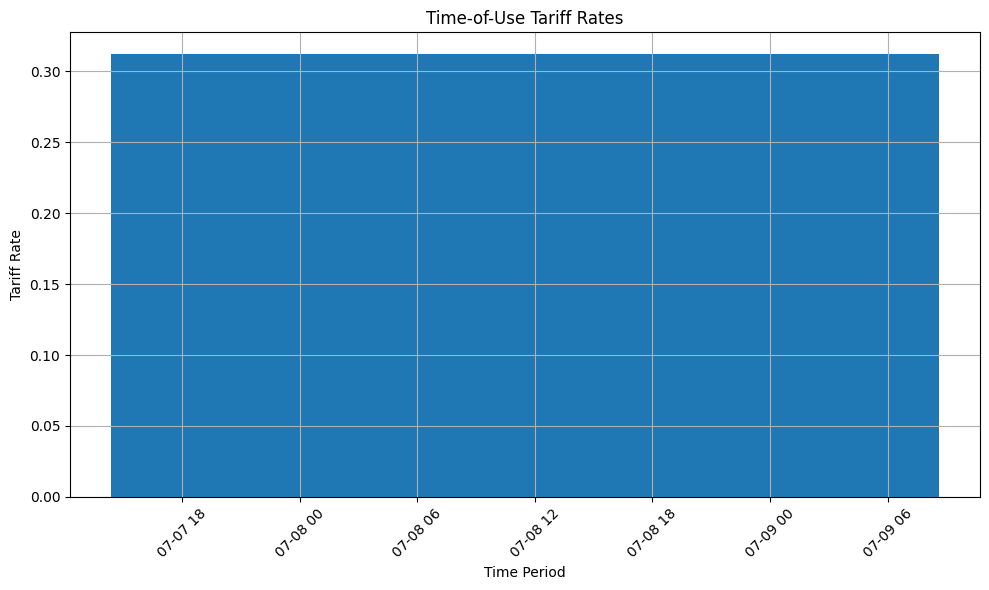

In [105]:
# Plot the tariff rate over time as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(tariff_df['time_period'], tariff_df['tariff_rate'])
plt.xlabel('Time Period')
plt.ylabel('Tariff Rate')
plt.title('Time-of-Use Tariff Rates')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Definition of functions




In [27]:
!pip install gekko

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 50.6 MB/s eta 0:00:00


In [47]:
# Define the Rule-Based controller for the Demand Response

def simulate_load_shifting(production, consumption, net_load, perc=0.2):
    """
    Simulates load shifting based on net load conditions.

    Parameters:
    - production (pd.Series): Series with production data over time.
    - consumption (pd.Series): Series with consumption data over time.
    - net_load (pd.Series): Series with net load data over time.
    - perc (float): Percentage of consumption to be shifted during applicable hours.

    Returns:
    - pd.DataFrame: DataFrame with columns for original and shifted energy consumption, and PV used.
    """
    hours = len(production)
    timeframe = np.linspace(0, hours - 1, hours)
    P_shifted_neg = np.zeros(hours)
    P_shifted_pos = np.zeros(hours)

    # First pass: Identify and calculate shifted loads
    for i in range(hours):
        if net_load[i] >= 0:
            P_shifted_neg[i] = perc * consumption[i]  # Shift negative load
        else:
            if i >= 8:  # Ensure index is within bounds for accessing past values
                P_shifted_pos[i] = P_shifted_neg[i - 8]

    # Second pass: Adjust for afternoon shifted loads
    for i in range(hours):
        if i >= 16:  # Ensure index is within bounds for adjusting afternoon loads
            if net_load[i] <= 0:
                P_shifted_pos[i] += P_shifted_neg[i - 7]

    # Calculate new consumption values
    Cons_new_df = consumption + P_shifted_pos - P_shifted_neg

    # Calculate energy used from PV before and after shift
    P_PV_used = np.where(net_load < 0, consumption, production)
    P_PV_used_new = np.where(net_load < 0, Cons_new_df, production)

    results = pd.DataFrame({
        'Time': timeframe,
        'Cons_new': Cons_new_df,
        'P_PV_used': P_PV_used,
        'P_PV_used_new': P_PV_used_new
    }, index=production.index)

    return results



In [28]:
# Define the Rule-based controller for charging-discharging the battery
def simulate_battery_operation(pv, load, soc, capacity, charge_rate, discharge_rate, P_PV_used):
    dod = 0.1*capacity
    net_load = load - pv  # Negative if excess PV

    if net_load < 0 :  # Charge when we have Excess PV
        charge_power = 0.98*min(-net_load, charge_rate, capacity - soc)
        soc += charge_power  # Charge the battery
        P_PV_used += load
        #net_load = 0  # Set net load to zero since it's handled by PV and battery
        net_load += charge_power  #
        discharge_power = 0

    else :  # If Net Load possitive
        discharge_power = 0.98*min(net_load, discharge_rate, soc )
        if soc <= 1.5*dod:              # Min SOC is at DoD
           discharge_power = 0
           soc = dod;

        soc -= discharge_power  # Discharge the battery
        P_PV_used += pv
        net_load -= discharge_power  # Reduce net load by the discharged amount
        charge_power = 0

    return soc, net_load , P_PV_used, charge_power, discharge_power


def run_battery_simulation(Production, Consumption, initial_soc, battery_capacity,
                           max_charge_rate, max_discharge_rate, timestamp, simulate_battery_operation):
    """
    Runs a battery operation simulation over a specified period.

    Parameters:
    - Production (pd.Series): A pandas Series containing the production data.
    - Consumption (pd.Series): A pandas Series containing the consumption data.
    - initial_soc (float): Initial state of charge of the battery.
    - battery_capacity (float): The capacity of the battery.
    - max_charge_rate (float): Maximum charge rate of the battery.
    - max_discharge_rate (float): Maximum discharge rate of the battery.
    - timestamp: DataFrame containing the timestamps and possibly other relevant data.
    - simulate_battery_operation (function): Function to simulate one timestep of battery operation.

    Returns:
    - pd.DataFrame: A DataFrame containing the results of the simulation.
    """
    # Initialize DataFrame for results
    results = pd.DataFrame(index=Production.index)
    results['PV'] = Production
    results['Load'] = Consumption
    results['SOC'] = initial_soc  # Initialize SOC to the minimum value
    results['P_PV_used'] = 0.00
    results['Net Load'] = 0.00
    results['Timestamp'] = timestamp;

    # Initialize battery SOC
    battery_soc = initial_soc

    # Run simulation
    for i in results.index:
        battery_soc, net_load, P_PV_used, charge_power, discharge_power = simulate_battery_operation(
            results.at[i, 'PV'],
            results.at[i, 'Load'],
            battery_soc,
            battery_capacity,
            max_charge_rate,
            max_discharge_rate,
            results.at[i, 'P_PV_used']
        )
        results.at[i, 'SOC'] = battery_soc
        results.at[i, 'Net Load'] = net_load
        results.at[i, 'P_PV_used'] = P_PV_used
        results.at[i, 'Charging'] = charge_power
        results.at[i, 'Discharging'] = discharge_power

    return results


Definition of Optimization function

In [29]:
from gekko import GEKKO

def run_battery_optimization(Production, Consumption, tariffs, soc_min, hours, NetLoad, battery_capacity):
    """
    Runs a battery optimization simulation using the GEKKO library.

    Args:
        Production (list): Hourly electricity production.
        Consumption (list): Hourly electricity consumption.
        tariffs (list): Hourly electricity tariffs.
        soc_min (float): Minimum state of charge for the battery.
        hours (int): Number of hours to simulate.
        NetLoad (list): Net load calculated as Production minus Consumption.

    Returns:
        None but prints the hourly charging, discharging schedule, and SOC.
    """

    # Initialize GEKKO model
    m = GEKKO(remote=False)

    # Battery specifications
    initial_soc = soc_min  # Initial state of charge in Wh
    eff = 0.98  # round trip efficiency of the battery
    #battery_capacity = 0.95 * 6000  # in Wh

    max_charge_rate = 0.5 * battery_capacity
    max_discharge_rate = 0.75 * max_charge_rate

    # Variables
    charge = [m.Var(value=0, lb=0, ub=max_charge_rate, name=f'charge_{i}') for i in range(hours)]
    discharge = [m.Var(value=0, lb=0, ub=max_discharge_rate, name=f'discharge_{i}') for i in range(hours)]
    soc = [m.Var(value=initial_soc, lb=soc_min, ub=battery_capacity, name=f'soc_{i}') for i in range(hours)]

    # Initial state of charge
    m.Equation(soc[0] == initial_soc + eff * charge[0] - eff * discharge[0])

    # State of charge constraints for subsequent hours
    for i in range(1, hours):
        m.Equation(soc[i] == soc[i-1] + eff * charge[i] - eff * discharge[i])

    # Complementarity constraint: Charge and discharge cannot be non-zero simultaneously
    for i in range(hours):
        m.Equation(charge[i] * discharge[i] == 0)

    # Objective function: Minimize the absolute net load
    net_load = [Consumption[i] - Production[i] + eff * charge[i] - eff * discharge[i] for i in range(hours)]
    m.Minimize(m.sum([m.abs3(net_load[i]) for i in range(hours)]))
    #m.Minimize(m.sum([tariffs[i]*m.abs3(net_load[i]) for i in range(hours)]))

    # Solve the model
    m.options.SOLVER = 1  # APOPT solver for NLP
    m.solve(disp=True)

    # Print results
    #print('Charging and Discharging Schedule:')
    #for i in range(hours):
    #    print(f'Hour {i+1}: Charge = {round(charge[i].value[0])}, Discharge = {round(discharge[i].value[0])}, SOC = {round(soc[i].value[0])}')
    # Convert lists to numpy arrays
    charge_array = np.array(charge).flatten()
    discharge_array = np.array(discharge).flatten()
    soc_array = np.array(soc).flatten()

    optimized_net_load = Consumption - Production + charge_array - discharge_array
    #optimized_net_load

    # Calculate SOC over the time period
    P_PV_used = []
    next_P_PV_used = 0

    for i in range(hours):
        #optimized_net_load[i] = Consumption[i] - Production[i] + charge[i] - discharge[i]
        if NetLoad[i] <= 0:
          next_P_PV_used = Consumption[i]
        else:
          next_P_PV_used = Production[i]
        P_PV_used.append(next_P_PV_used)

    results3 = pd.DataFrame(index=Production.index)
    results3['SOC'] = soc_array
    results3['Net Load'] = optimized_net_load
    results3['P_PV_used'] = P_PV_used
    results3['Charging'] = charge_array
    results3['Discharging'] = discharge_array

    # Round all numeric columns to two decimal places
    results3 = results3.applymap(lambda x: round(x, 3) if isinstance(x, (int, float)) else x)

    # Display the DataFrame
    #print(results3)

    return soc_array, optimized_net_load , charge_array, discharge_array , results3




Define the Performance metrics

In [30]:
# Define evaluation metrics
def system_efficiency(pv_data, load_data, results_bat, results_no_bat):
    # Assume that results_* DataFrame contains columns for 'Net Load', 'PV Used', 'Battery Flow'
    # Make temporary local variables to estimate
    charge_from_PV = results_bat['Charging'].copy()
    discharge_from_PV = results_bat['Discharging'].copy()
    Power_PV_used = results_bat['P_PV_used'].copy();

    # Calculate Charge/discharge only from PV, and not from the grid!
    for i in range(len(results_bat)):
        if results_no_bat.at[i, 'NetLoad'] >= 0:
           charge_from_PV.at[i] = 0
        else:
           discharge_from_PV.at[i] = 0;

    # Calculate total Energy metrics
    E_total_pv = pv_data.sum()       # total energy by PVs  (Wh)
    E_total_load = load_data.sum()   # total energy by Load (Wh)
    E_total_net = E_total_pv - E_total_load  # total net (Wh)

    #E_bat = 0.5*(abs(results['Net Load'] - NetLoad)).sum()
    #E_bat = max(results_bat['SOC'])         # Assuming max SOC as total energy stored in battery
    #E_charging = results_bat['Charging'].sum()
    #E_discharging = results_bat['Discharging'].sum()
    E_charging = charge_from_PV.sum()
    E_discharging = discharge_from_PV.sum()
    E_used_pv = Power_PV_used.sum()
    E_wasted_pv = E_total_pv - E_used_pv    # Assuming E_used_pv is energy directly used by the load

    # Efficiency with battery
    # Self Sufficiency with battery
    SS_bat = (( E_used_pv +  E_discharging ) / E_total_load )*100
    # PV Self-Consumption Rate including with battery
    SC_bat = (( E_used_pv + E_charging ) / E_total_pv )*100 if E_total_pv != 0 else 0
    # Load Coverage
    #net_load_clipped = results_bat['Net Load'].clip(lower=0).sum()  # Energy not covered by PV and needing grid
    #LC_bat = (1 - (net_load_clipped / E_total_load)) * 100

    # Efficiency without battery
    # Self Sufficiency withoutbattery
    SS_no_bat = ( E_used_pv  / E_total_load )*100
    # PV Self-Consumption Rate
    SC_no_bat = ( E_used_pv  / E_total_pv ) *100 if E_total_pv != 0 else 0
    # Load Coverage
    #net_no_battery = results_no_bat['NetLoad'].clip(lower=0).sum()  # Energy not covered by PV and needing grid
    #LC_no_bat = (1 - (net_no_battery / E_total_load)) * 100

    efficiency_with_battery = {
        'Self Suff Rate%': round(SS_bat,2) ,
        'Self Cons Rate %':  round(SC_bat,2),
       # 'Load Coverage Ratio %': round(LC_bat ,2 )
    }
    efficiency_without_battery = {
        'Self Suff Rate%': round(SS_no_bat,2) ,
        'Self Cons Rate %': round(SC_no_bat,2),
       # 'Load Coverage Ratio %': round(LC_no_bat ,2)
    }

    return efficiency_with_battery, efficiency_without_battery, SS_bat, SC_bat, SS_no_bat, SC_no_bat



Define tariff costs and savings

In [31]:
def tariff_costs( results_bat, results_no_bat, bat_capacity  ):
    '''
    # Only the savings of Self-Consumption considered
    cost_no_PV =    0.001*(buy_tariffs *  results_no_bat['Consumption'].clip(lower=0)).sum()
    cost_no_bat =   0.001*(buy_tariffs *  results_no_bat['NetLoad'].clip(lower=0)).sum()
    cost_with_bat = 0.001*(buy_tariffs *  results_bat['Net Load'].clip(lower=0)).sum()
    '''

    '''
    # Net Metering scheme
    cost_no_PV =    0.001*(buy_tariffs *  results_no_bat['Consumption'].clip(lower=0)).sum()
    cost_no_bat =   0.001*(buy_tariffs *  results_no_bat['NetLoad'].clip(lower=0)).sum() + 0.001*(netMet *  results_no_bat['NetLoad'].apply(lambda x: x if x < 0 else 0)).sum()
    cost_with_bat = 0.001*(buy_tariffs *  results_bat['Net Load'].clip(lower=0)).sum() + 0.001*(netMet *  results_bat['NetLoad'].apply(lambda x: x if x < 0 else 0)).sum()
    '''

    # Net billing scheme
    cost_no_PV =    0.001*(buy_tariffs *  results_no_bat['Consumption'].clip(lower=0)).sum()
    cost_no_bat =   0.001*(buy_tariffs *  results_no_bat['NetLoad'].clip(lower=0)).sum() + 0.001*(sell_tariffs *  results_no_bat['NetLoad'].apply(lambda x: x if x < 0 else 0)).sum()
    cost_with_bat = 0.001*(buy_tariffs *  results_bat['Net Load'].clip(lower=0)).sum() + 0.001*(sell_tariffs *  results_bat['Net Load'].apply(lambda x: x if x < 0 else 0)).sum()


    return  round(cost_with_bat,2) , round(cost_no_bat,2) , round(cost_no_PV,2)


Net Present Value estimation

In [32]:
### Net Present Value estimation

def calculate_npv(cash_flows, discount_rate, initial_investment=0):
    """
    Calculate Net Present Value (NPV)

    Parameters:
    cash_flows (pd.Series or np.array): Cash flows over time
    discount_rate (float): The discount rate (as a decimal)
    initial_investment (float): The initial investment cost (default 0)

    Returns:
    float: The Net Present Value
    """

    # Convert to numpy array if it's a pandas Series
    if isinstance(cash_flows, pd.Series):
       cash_flows = cash_flows.values
    #cash_flows = cashflow_df.iloc[:, 0].values  # Assumes cash flows are in the first column

    # Calculate the present values
    #present_values = cash_flows / (1 + discount_rate) ** np.arange(len(cash_flows))
    present_values = cash_flows / (1 + discount_rate) ** np.arange(1, len(cash_flows)+1)

    # Calculate NPV
    npv = np.sum(present_values) - initial_investment

    return npv

 EBITDA based on revenue, cost of goods sold (COGS), operating expenses (OPEX), and other income or expenses. The formula for EBITDA is:

EBITDA
=
Revenue
−
COGS
−
OPEX
+
Other Income (if any)
EBITDA=Revenue−COGS−OPEX+Other Income (if any)

In [33]:
def calculate_ebitda(revenue, cogs, opex, other_income=0):
    """
    Estimates EBITDA based on the provided revenue, COGS, operating expenses, and other income.

    Parameters:
    revenue (float or array-like): Total revenue generated by the business.
    cogs (float or array-like): Cost of Goods Sold.
    opex (float or array-like): Operating Expenses.
    other_income (float or array-like, optional): Other non-operating income or expenses. Default is 0.

    Returns:
    float: Estimated EBITDA.
    """
    # Calculate EBITDA
    ebitda = revenue - cogs - opex + other_income

    return ebitda

# Example data
revenue = 1000000  # Total revenue
cogs = 400000      # Cost of goods sold
opex = 150000      # Operating expenses
other_income = 20000  # Other non-operating income

# Calculate EBITDA
ebitda = calculate_ebitda(revenue, cogs, opex, other_income)
print("Estimated EBITDA:", ebitda)

Estimated EBITDA: 470000


Revenue to Expenditure Ratio=
Total Expenditure /
Total Revenue
​


In [34]:
def calculate_revenue_to_expenditure_ratio(revenue, expenditure):
    """
    Estimates the revenue to expenditure ratio.

    Parameters:
    revenue (float or array-like): Total revenue generated by the business.
    expenditure (float or array-like): Total expenditures (including COGS, OPEX, and any other expenses).

    Returns:
    float: Revenue to expenditure ratio.
    """
    if expenditure == 0:
        raise ValueError("Expenditure cannot be zero to calculate the revenue to expenditure ratio.")

    # Calculate the ratio
    ratio = revenue / expenditure

    return ratio

In [35]:
!pip install numpy-financial

In [36]:
import numpy_financial as npf # Import the numpy-financial library

def find_irr(cash_flows, initial_investment, guess=0.1, tolerance=1e-4, max_iterations=300):
    """
    Estimate the Internal Rate of Return (IRR) using the Newton-Raphson method.

    Parameters:
    cash_flows (list of float): The cash flows for each period
    initial_investment (float): The initial investment (negative value)
    guess (float): Initial guess for the IRR
    tolerance (float): Tolerance for stopping the iteration
    max_iterations (int): Maximum number of iterations

    Returns:
    float: Estimated IRR
    """
    current_guess = guess
    for _ in range(max_iterations):
        # Use npf.npv() from numpy-financial instead of the overwritten 'npv' variable
        npv_current = npf.npv(current_guess, [initial_investment] + cash_flows)
        derivative_npv = sum(-t * cf / (1 + current_guess) ** (t + 1) for t, cf in enumerate(cash_flows, start=1))

        new_guess = current_guess - npv_current / derivative_npv
        if abs(new_guess - current_guess) < tolerance:
            return new_guess
        current_guess = new_guess

    raise RuntimeError("IRR calculation did not converge")

# Example usage:
#cash_flows = [300, 320, 340, 360, 380]  # Positive cash flows from the investment
#initial_investment = -1000  # Negative value for the initial investment
#irr_result = find_irr(cash_flows, initial_investment)
#print(f"Calculated IRR: {irr_result:.4f} or {irr_result * 100:.2f}%")



# Sensitivity Analysis on SS,SC vs Battery Capacity
using Rule-Based Controller




In [110]:
# Loop BAttery capacity to check best SS and SC
# List of battery capacities to test
battery_capacities = [000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
#battery_capacities = [ 0000, 5000, 7500, 10000, 12500, 15000]
pv_scale_factors = [0, 1, 1.67, 2.5, 3, 3.3]  # Scale factors for the PV system sizes

# array to hold efficiency results for each capacity
efficiency_results = {}
Cost_results ={}

for battery_capacity in battery_capacities:
    # Calculate other battery parameters based on the capacity
    battery_capacity_wh = 0.95 * battery_capacity  # in Wh
    max_charge_rate = 0.5 * battery_capacity_wh  # Max charge rate in W (power)
    max_discharge_rate = 0.75 * max_charge_rate  # Max discharge rate in W (power)
    initial_soc = 0.05 * battery_capacity_wh

    # Run the battery simulation
    results = run_battery_simulation(Production, Consumption, initial_soc, battery_capacity_wh,
                                     max_charge_rate, max_discharge_rate, timestamp, simulate_battery_operation)

    # Assuming you have a function `system_efficiency` that calculates the efficiency
    efficiency_with_battery, efficiency_without_battery, SS_bat, SC_bat, SS_no_bat, SC_no_bat = system_efficiency(Production, Consumption, results, hourly_df)

    # Tariffs saved
    price_per_KWh = 0*1000 # euros
    cost_metrics = tariff_costs(results, hourly_df , battery_capacity )

    # Store the results
    #efficiency_results[battery_capacity] = {'Efficiency with Battery': eff_with, 'Efficiency without Battery': eff_without}
    efficiency_results[battery_capacity] = [ SS_bat, SC_bat ]

    Cost_results[battery_capacity] = cost_metrics[:3]  # cost_with, cost_without


# Convert the results dictionary to a DataFrame for easier analysis and visualization
efficiency_df = pd.DataFrame(efficiency_results).T
cost_df = pd.DataFrame(Cost_results).T
#efficiency_df.columns = ['Efficiency with Battery', 'Efficiency without Battery']  # Adding meaningful column names
efficiency_df.columns = ['Self Sufficiency', 'Self Consumption' ]  # Adding meaningful column names
cost_df.columns = ['Cost with Battery', 'Cost without Battery', 'Cost without PV' ]  # Adding meaningful column names

# Print DataFrame
print(efficiency_df) ;


       Self Sufficiency  Self Consumption
0             48.536638         68.897961
2000          56.399514         79.717561
3000          59.490892         83.960134
4000          61.952310         87.550822
5000          63.949659         90.695519
6000          65.518647         93.315241
7000          66.564347         95.042709
8000          66.981427         95.866074
9000          67.108447         96.131714
10000         67.095272         96.303760
11000         67.034755         96.461653
12000         66.989882         96.576072
13000         66.882547         96.679374
14000         66.750814         96.783653
15000         66.561688         96.863479


In [111]:
cost_df['Savings'] = cost_df['Cost without Battery'] - cost_df['Cost with Battery']
print(cost_df)

#savings = (cost_without_PV - cost_with)    # Savings with VS without PV+Battery

# Create an array of cash flows for the specified number of years
#cash_flows = np.full((years,), savings )  # Assuming fixed savings cashflow every year

       Cost with Battery  Cost without Battery  Cost without PV  Savings
0                 950.72               1161.66          2247.34   210.94
2000              826.31               1161.66          2247.34   335.35
3000              782.95               1161.66          2247.34   378.71
4000              749.08               1161.66          2247.34   412.58
5000              723.08               1161.66          2247.34   438.58
6000              703.29               1161.66          2247.34   458.37
7000              689.89               1161.66          2247.34   471.77
8000              685.06               1161.66          2247.34   476.60
9000              683.68               1161.66          2247.34   477.98
10000             684.76               1161.66          2247.34   476.90
11000             687.11               1161.66          2247.34   474.55
12000             688.69               1161.66          2247.34   472.97
13000             691.69               1161.66     

In [112]:
cost_df['Savings']

,Savings
0,210.94
2000,335.35
3000,378.71
4000,412.58
5000,438.58
6000,458.37
7000,471.77
8000,476.60
9000,477.98
10000,476.90


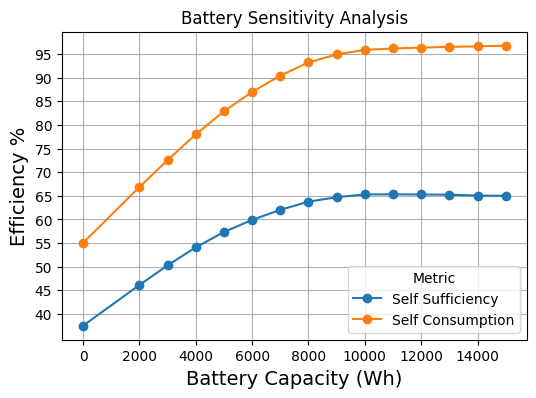

In [88]:
# Plotting results
import matplotlib.pyplot as plt

# valid plots include "line", "bar", "barh", "hist", "box", "kde", "density", "area", "pie", "scatter", "hexbin"
#efficiency_df.plot(kind='bar', figsize=(12, 6))
#efficiency_df.plot(kind='line', figsize=(10, 5))

plt.figure(figsize=(6, 4))
plt.plot(efficiency_df.index, efficiency_df['Self Sufficiency'], marker='o', label='Self Sufficiency')
plt.plot(efficiency_df.index, efficiency_df['Self Consumption'], marker='o', label='Self Consumption')
plt.title('Battery Sensitivity Analysis')
plt.xlabel('Battery Capacity (Wh)',  fontsize=14)
plt.ylabel('Efficiency %',  fontsize=14)
# Set y-axis to show specific ticks
plt.yticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])
plt.legend(title='Metric')
plt.grid(True)
plt.show()

# Saving results to CSV
#efficiency_df.to_csv("battery_efficiency_results.csv")


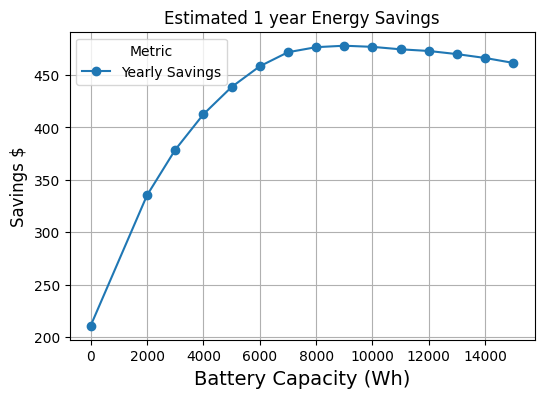

In [96]:
plt.figure(figsize=(6, 4))
plt.plot(cost_df.index, cost_df['Savings'], marker='o', label='Yearly Savings')
plt.title('Estimated 1 year Energy Savings')
plt.xlabel('Battery Capacity (Wh)',  fontsize=14)
plt.ylabel('Savings $',  fontsize=12)
# Set y-axis to show specific ticks
#plt.yticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])
plt.legend(title='Metric')
plt.grid(True)
plt.show()

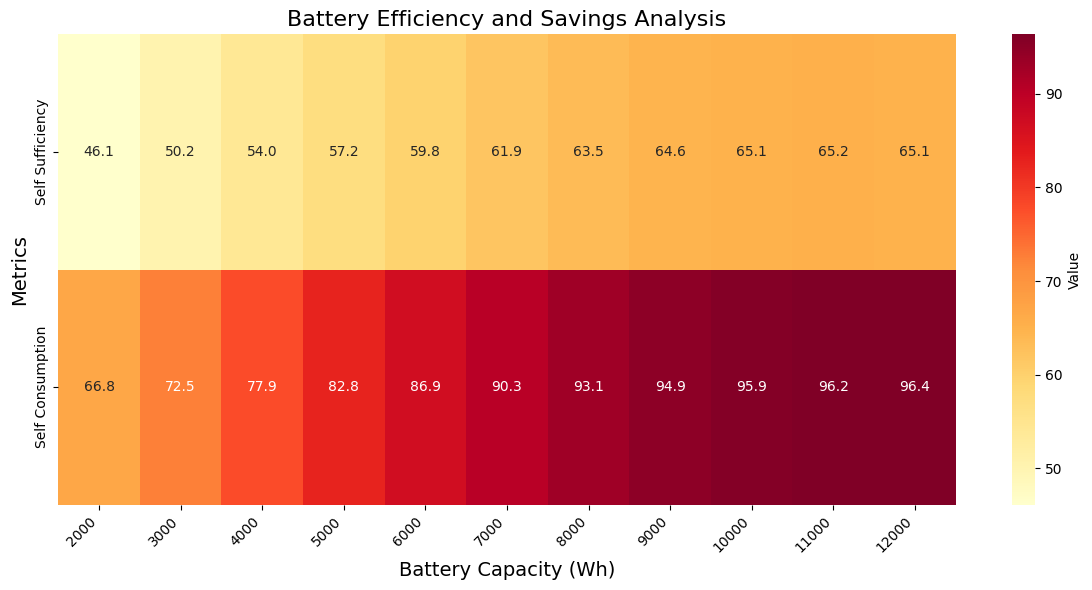

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming efficiency_df and cost_df have the same index (Battery Capacity)
battery_capacities = efficiency_df.index

# Create a 2D array for the heatmap
data = np.array([
    efficiency_df['Self Sufficiency'],
    efficiency_df['Self Consumption'],
   # cost_df['Savings']
])

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data, annot=True, fmt='.1f', cmap='YlOrRd',
            xticklabels=battery_capacities,
            yticklabels=['Self Sufficiency', 'Self Consumption'],
           # yticklabels=['Self Sufficiency', 'Self Consumption', 'Yearly Savings'],
            cbar_kws={'label': 'Value'})

plt.title('Battery Efficiency Analysis', fontsize=16)
plt.xlabel('Battery Capacity (Wh)', fontsize=14)
plt.ylabel('Metrics', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Sensitivity Analysis of SS,SC and Costs vs BatCap vs PV system kW
Rule-Based Controller used (runs very fast)

In [ ]:
'''
Production = hourly_df['Production']
Consumption = hourly_df['Consumption']
#Consumption = results['Cons_new']
NetLoad =  hourly_df['NetLoad']
NetLoad.head()
'''

"\nProduction = hourly_df['Production']\nConsumption = hourly_df['Consumption']\n#Consumption = results['Cons_new']\nNetLoad =  hourly_df['NetLoad']\nNetLoad.head()\n"

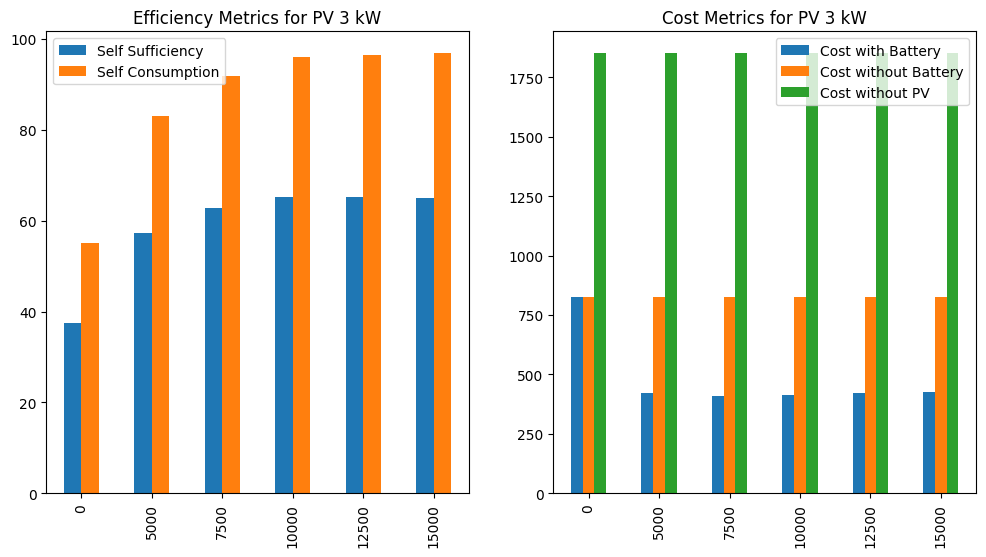

In [61]:
# List of battery capacities to test
battery_capacities = [ 0000, 5000, 7500, 10000, 12500, 15000]  # Wh
pv_scale_factors = [0, 1, 1.3333333333, 1.66666666666667, 2.5, 3.33333333333333]  # Scale factors for the PV system sizes

# Dictionary to hold efficiency and cost results
results_dict = {}

for scale_factor in pv_scale_factors:
    efficiency_results = {}
    cost_results = {}

    for battery_capacity in battery_capacities:
        # Calculate derived battery parameters
        battery_capacity_wh = 0.95 * battery_capacity
        max_charge_rate = 0.5 * battery_capacity_wh
        max_discharge_rate = 0.75 * max_charge_rate
        initial_soc = 0.05 * battery_capacity_wh

        # Scale the Production data , update the Net Load
        scaled_production = scale_factor * Production  # Assuming 'Production' is a pandas Series or DataFrame
        hourly_df['Production'] = scaled_production;
        hourly_df['NetLoad'] = Consumption - scaled_production;

        # Run the battery simulation
        try:
            results = run_battery_simulation(scaled_production, Consumption, initial_soc, battery_capacity_wh,
                                             max_charge_rate, max_discharge_rate, timestamp, simulate_battery_operation)
            efficiency_metrics = system_efficiency(scaled_production, Consumption, results, hourly_df)
            cost_metrics = tariff_costs(results, hourly_df , battery_capacity )

            # Store the results for each battery capacity
            efficiency_results[battery_capacity] = efficiency_metrics[2:4]  # SS_bat, SC_bat
            cost_results[battery_capacity] = cost_metrics[:3]  # cost_with, cost_without
        except Exception as e:
            print(f"Error with battery capacity {battery_capacity} and PV scale factor {scale_factor}: {e}")

    # Store results for each scale factor for each batery capacity
    results_dict[scale_factor] = {
        'efficiency': pd.DataFrame.from_dict(efficiency_results, orient='index', columns=['Self Sufficiency', 'Self Consumption']),
        'cost': pd.DataFrame.from_dict(cost_results, orient='index', columns=['Cost with Battery', 'Cost without Battery', 'Cost without PV'])
    }

# Example of how to access and plot results for a specific PV scale factor
scale_to_plot = 1  # Example: scale factor 1
efficiency_df = results_dict[scale_to_plot]['efficiency']
cost_df = results_dict[scale_to_plot]['cost']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
efficiency_df.plot.bar(ax=ax[0], title=f"Efficiency Metrics for PV {scale_to_plot*3} kW")
cost_df.plot.bar(ax=ax[1], title=f"Cost Metrics for PV {scale_to_plot*3} kW")
plt.show()


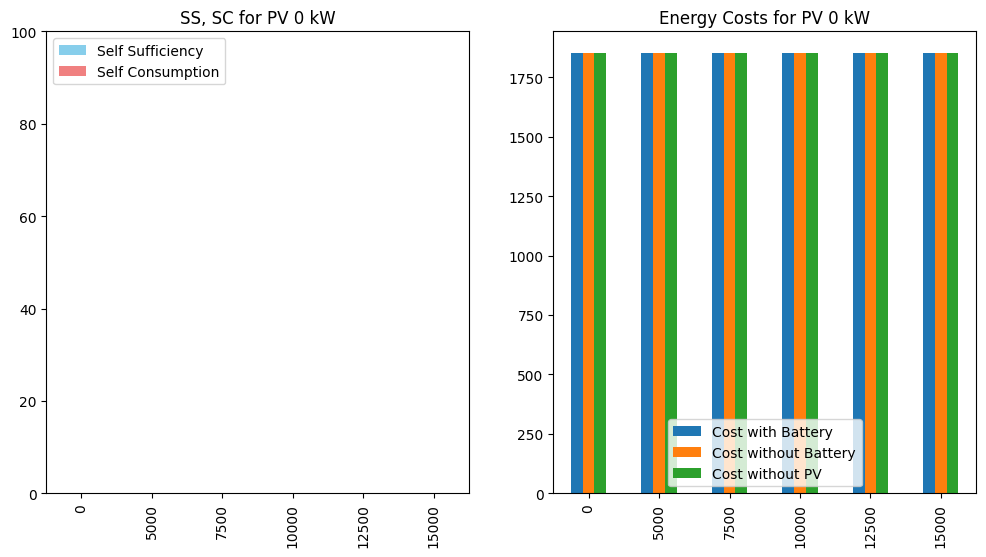

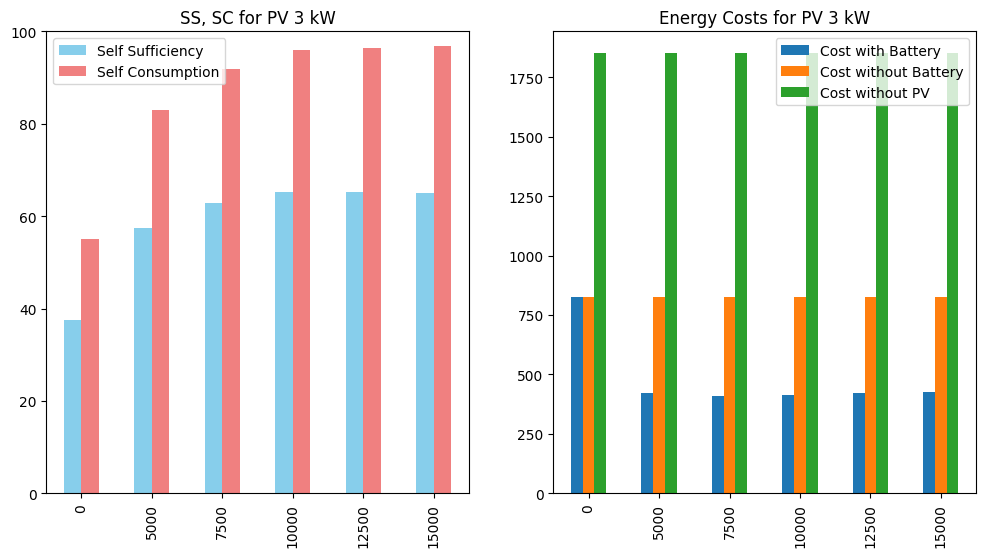

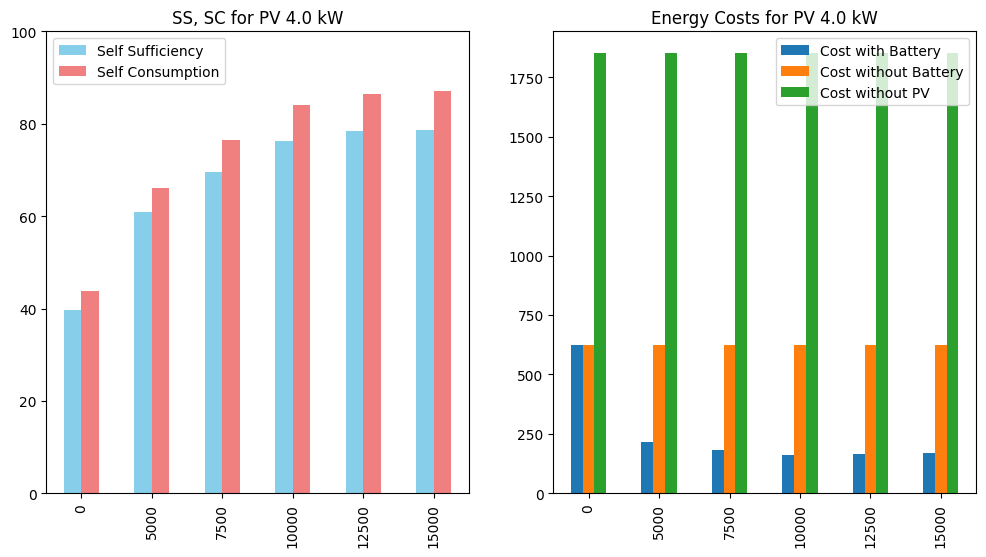

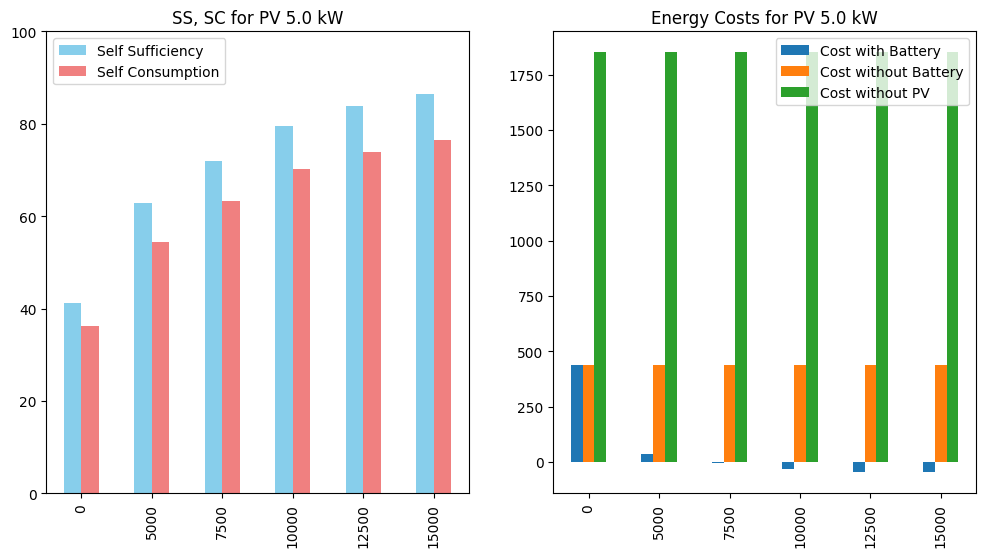

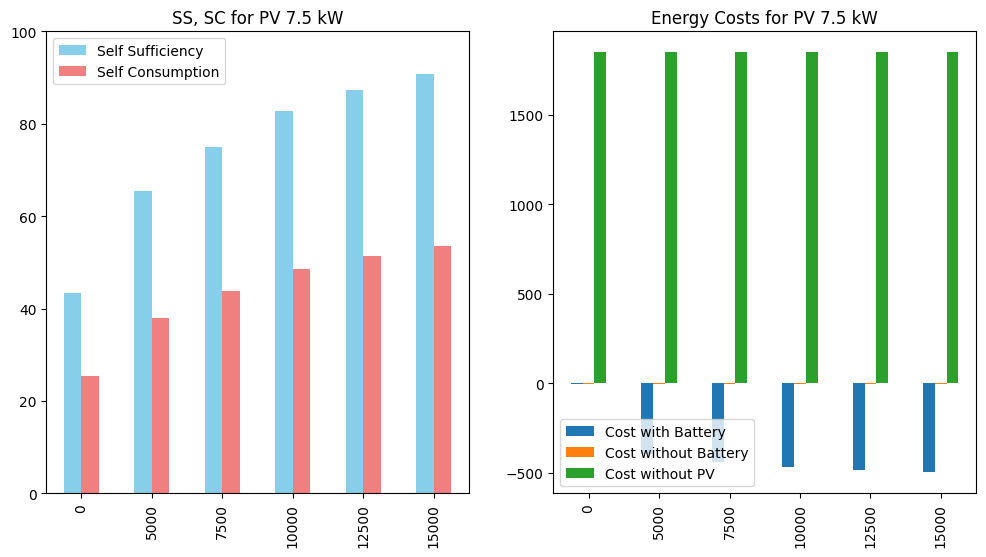

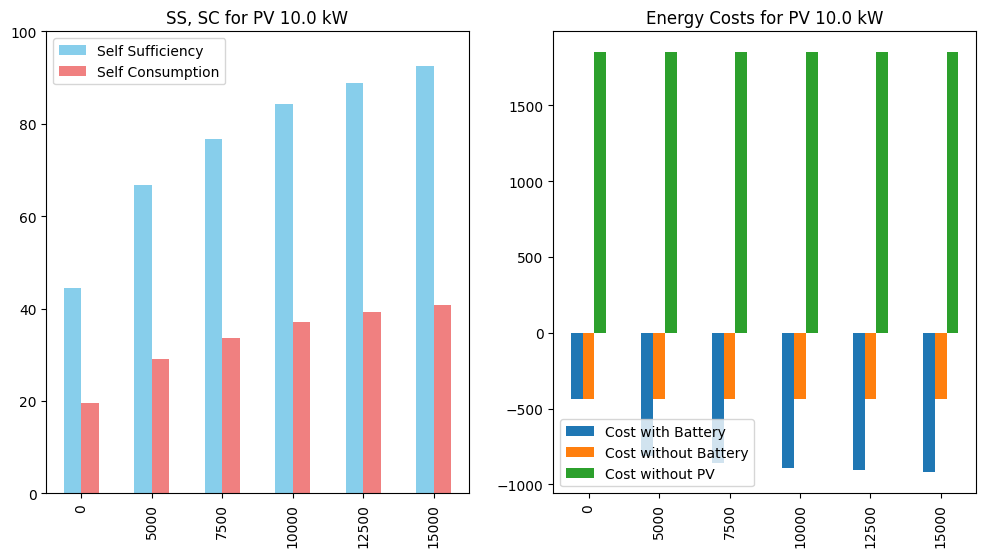

In [64]:
for scale_factor in results_dict:
    efficiency_df = results_dict[scale_factor]['efficiency']
    cost_df = results_dict[scale_factor]['cost']

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    efficiency_df.plot.bar(ax=ax[0], title=f"SS, SC for PV {round(scale_factor*3,2)} kW",
                            color=['skyblue', 'lightcoral'])
    ax[0].set_ylim(0, 100) # Set y-axis limits for the first plot
    ax[0].legend(loc='upper left')
    cost_df.plot.bar(ax=ax[1], title=f"Energy Costs for PV {round(scale_factor*3,2)} kW",
                     color=['tab:blue', 'tab:orange', 'tab:green'])
    plt.show()

In [65]:
# Assuming results_dict is already populated with your simulation results
# Initialize an empty matrix for self-sufficiency
self_sufficiency_matrix = []
self_consumption_matrix = []

# Iterate over each PV scale factor to extract self-sufficiency data
for scale_factor in pv_scale_factors:
    # Self-sufficiency data
    ss_data = results_dict[scale_factor]['efficiency']['Self Sufficiency'].values
    self_sufficiency_matrix.append(ss_data)

    # Self-consumption data
    sc_data = results_dict[scale_factor]['efficiency']['Self Consumption'].values
    self_consumption_matrix.append(sc_data)

# Convert to a numpy array for better handling in plotting
self_sufficiency_matrix = np.array(self_sufficiency_matrix)
self_consumption_matrix = np.array(self_consumption_matrix)

# Labels for the axes
battery_sizes = [str(round(bc/1000,2)) + " kWh" for bc in battery_capacities]
pv_sizes = [str(round(pf*3,1)) + " kW" for pf in pv_scale_factors]

# Create DataFrames for plotting
df_self_sufficiency = pd.DataFrame(self_sufficiency_matrix, index=pv_sizes, columns=battery_sizes)
df_self_consumption = pd.DataFrame(self_consumption_matrix, index=pv_sizes, columns=battery_sizes)


In [ ]:
df_self_sufficiency

,0.0 kWh,5.0 kWh,7.5 kWh,10.0 kWh,12.5 kWh,15.0 kWh
0 kW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3 kW,37.502817,57.339151,62.860012,65.296013,65.210165,64.996369
4.0 kW,39.705508,60.838465,69.636533,76.287504,78.497527,78.690372
5.0 kW,41.188637,62.809913,71.991052,79.551863,83.766670,86.374118
7.5 kW,43.309230,65.434545,75.063954,82.821935,87.330155,90.768684
10.0 kW,44.497348,66.826899,76.750393,84.211521,88.843479,92.442202


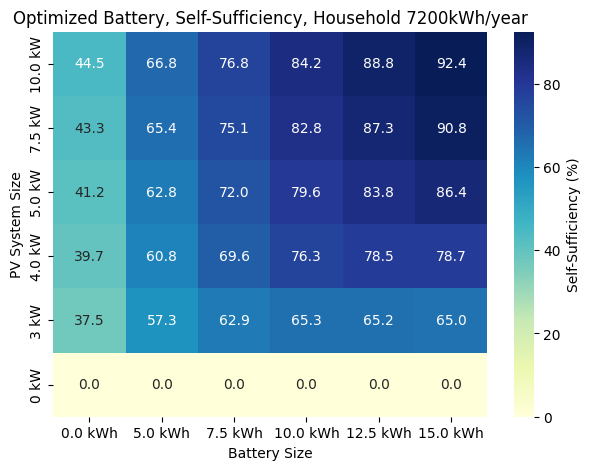

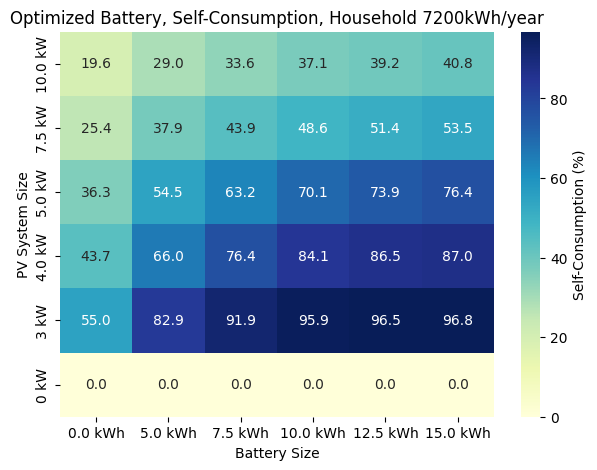

In [66]:
plt.figure(figsize=(7, 5))
sns.heatmap(df_self_sufficiency, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Self-Sufficiency (%)'})
plt.title('Optimized Battery, Self-Sufficiency, Household 7200kWh/year')
plt.xlabel('Battery Size')
plt.ylabel('PV System Size')
plt.gca().invert_yaxis() # Invert y-axis
plt.show()

plt.figure(figsize=(7, 5))
sns.heatmap(df_self_consumption, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Self-Consumption (%)'})
plt.title('Optimized Battery, Self-Consumption, Household 7200kWh/year')
plt.xlabel('Battery Size')
plt.ylabel('PV System Size')
plt.gca().invert_yaxis() # Invert y-axis
plt.show()

In [ ]:
#results_dict[scale_factor]['cost']['Cost with Battery']
#results_dict[scale_factor]['cost']['Cost without Battery']
results_dict[scale_factor]['cost']['Cost without PV']

,Cost without PV
0,2247.61
5000,2247.61
7500,2247.61
10000,2247.61
12500,2247.61
15000,2247.61


In [ ]:
cost_with = results_dict[0]['cost']['Cost with Battery'][0]
cost_with

cost_without = results_dict[0]['cost']['Cost without Battery'][0]
cost_without

2247.61

In [ ]:
cost_with = results_dict[0]['cost']['Cost with Battery'][0000]
cost_without = results_dict[0]['cost']['Cost without Battery'][0000]
savings = (-cost_without + cost_with)   # Adjust as needed based on actual simulation results
savings


0.0

In [ ]:
cash_flows = np.full((years,), savings )  # Assuming fixed savings cashflow every year
cash_flows

NameError: name 'years' is not defined

In [ ]:
npv = calculate_npv(cash_flows, discount_rate, initial_investment)
npv

-284.31195642887997

In [62]:
#### Financial Analysis  ##########
# Sample data for the parameters (adapt as needed based on actual data)
years = 10  # Simulation period in years
subsidy = 0.00  # Subsidy percentage

#discount_rate = 0.075  # 7.5% Discount rate = reduce future returns
discount_rate = 0.05  # 7.5% Discount rate = reduce future returns
price_per_Wh = 0.500 * (1 - subsidy)  # euros per Wh for initial battery investment
price_per_Wpv = 1500   # euros per KW for initial PV System investment

# Initialize dictionary for NPV results
npv_results = {}
irr_results = {}
prof_index_res = {}

for scale_factor in pv_scale_factors[0:]:
    npv_per_batCap = {}
    irr_per_batCap = {}
    prof_index ={}

    for battery_capacity in battery_capacities[0:]:
        # Perform your existing simulation setup here
        cost_with = results_dict[scale_factor]['cost']['Cost with Battery'][battery_capacity]
        cost_without_bat = results_dict[scale_factor]['cost']['Cost without Battery'][battery_capacity]
        cost_without_PV = results_dict[scale_factor]['cost']['Cost without PV'][battery_capacity]

        #cost_with, cost_without_bat, cost_without_PV = tariff_costs(results, hourly_df , battery_capacity )

        # Calculate savings (assuming daily savings scaled up to yearly)
        #savings = (cost_without_bat - cost_with)   # Savings with VS without Battery
        savings = (cost_without_PV - cost_with)    # Savings with VS without PV+Battery

        # Create an array of cash flows for the specified number of years
        cash_flows = np.full((years,), savings )  # Assuming fixed savings cashflow every year
        degradation_factor = 0.995  # 0.5% degradation per year
        for i in range(1, years):
            cash_flows[i] = cash_flows[i - 1] * degradation_factor  # Apply degradation to subsequent years

        #if years > 10:
        #    cash_flows[10:] *= 0.8  # Reduce cash flows by 20% after year 10, because of battery Degradation

        # Calculate initial investment
        #initial_investment = battery_capacity * price_per_Wh
        initial_investment = battery_capacity * price_per_Wh + scale_factor * price_per_Wpv #include PV installation cost

        # Calculate NPV, IRR, PrfIndex
        npv = calculate_npv(cash_flows, discount_rate, initial_investment)
        npv_per_batCap[battery_capacity] = round(npv,2)
        prof_index[battery_capacity] = (npv_per_batCap[battery_capacity] )/initial_investment if initial_investment != 0 else 0
        #irr_per_batCap[battery_capacity] = find_irr(cash_flows, initial_investment)

    npv_results[scale_factor] = npv_per_batCap
    #irr_results[scale_factor] = irr_per_batCap
    prof_index_res[scale_factor] = prof_index

# Example to visualize or process your NPV data
npv_df = pd.DataFrame(npv_results)
#irr_df = pd.DataFrame(irr_results)
prof_index_df = pd.DataFrame(prof_index_res)

npv_df_transposed = npv_df.T
#irr_df_transposed = irr_df.T
prof_index_df_transposed = prof_index_df.T

#print(npv_df_transposed)
#print(irr_df_transposed)
print(npv_df_transposed)


             0         5000      7500      10000    12500    15000
0.000000      0.00  -2500.00  -3750.00  -5000.00 -6250.00 -7500.00
1.000000   6240.16   6792.37   5659.56   4373.17  3056.14  1757.49
1.333333   7267.40   7846.62   6877.15   5761.81  4498.20  3218.69
1.666667   8190.16   8731.25   7781.22   6744.12  5603.14  4327.03
2.500000  10295.52  10748.93   9830.22   8811.12  7674.60  6522.95
3.333333  12282.11  12661.07  11766.72  10730.45  9606.79  8468.46


In [ ]:
print(prof_index_df_transposed)

             0         5000      7500      10000     12500     15000
0.000000  0.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
1.000000  5.286193  5.526405  5.234742  4.783436  4.245331  3.789773
1.333333  4.354175  4.826892  4.867211  4.775720  4.454092  4.071806
1.666667  3.742824  4.268537  4.366274  4.371069  4.215416  4.005150
2.500000  2.851088  3.348598  3.488807  3.546716  3.480112  3.384741
3.333333  2.371446  2.806245  2.949536  3.007633  2.979667  2.926638


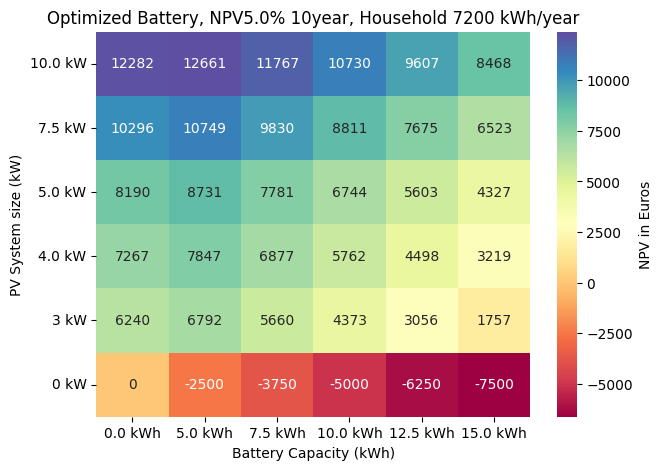

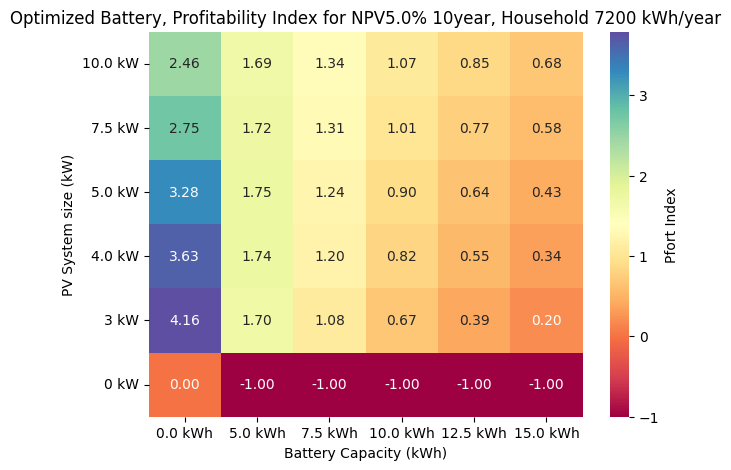

'\nYou can only directly compare projects with the same investment amounts.\nIf two projects have two different investment amounts, you could calculate a ‘profitability index’\nInterpretation\nPI > 1: The project is considered profitable, as the present value of future cash inflows exceeds the initial investment.\nPI = 1: The project is break-even, with the present value of future cash inflows equal to the initial investment.\nPI < 1: The project is unprofitable, as the present value of future cash inflows is less than the initial investment.\nPI < 0: Highly unprofitable\n'

In [67]:
# Plot NPV heatmap
fig, ax = plt.subplots(figsize=(7, 5))
#sns.heatmap(npv_df, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Euros'}, ax=ax)
sns.heatmap(npv_df_transposed, annot=True, fmt=".0f",
            cmap="Spectral",
            cbar_kws={'label': 'NPV in Euros'}, ax=ax,
            robust=True)
ax.set_title(f'Optimized Battery, NPV{discount_rate*100}% {years}year, Household 7200 kWh/year')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('PV System size (kW)')
ax.set_xticklabels(battery_sizes[0:], rotation=0)
ax.set_yticklabels(pv_sizes[0:], rotation=0)
ax.invert_yaxis()
plt.show()

'''
Any NPV greater than zero, means that the project generates a profit using discounted techniques.
A negative value indicates that the project does not recover the investment.
 Clearly, the larger the figure the better.
'''

# Plot Profitability Index heatmap
fig, ax = plt.subplots(figsize=(7, 5))
#sns.heatmap(npv_df, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Euros'}, ax=ax)
sns.heatmap(prof_index_df_transposed, annot=True, fmt=".2f",
            cmap="Spectral",
            cbar_kws={'label': 'Pfort Index'}, ax=ax,
            robust=True)
ax.set_title(f'Optimized Battery, Profitability Index for NPV{discount_rate*100}% {years}year, Household 7200 kWh/year')
#ax.set_title(f'Optimized Battery, ROI {years}year, Household 7200 kWh/year')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('PV System size (kW)')
ax.set_xticklabels(battery_sizes[0:], rotation=0)
ax.set_yticklabels(pv_sizes[0:], rotation=0)
ax.invert_yaxis()
plt.show()

'''
You can only directly compare projects with the same investment amounts.
If two projects have two different investment amounts, you could calculate a ‘profitability index’
Interpretation
PI > 1: The project is considered profitable, as the present value of future cash inflows exceeds the initial investment.
PI = 1: The project is break-even, with the present value of future cash inflows equal to the initial investment.
PI < 1: The project is unprofitable, as the present value of future cash inflows is less than the initial investment.
PI < 0: Highly unprofitable
'''

# Sensitivity Analysis on SS, SC vs Battery Capacity using Optimization (Gekko)


In [ ]:
# Loop BAttery capacity to check best SS and SC
# List of battery capacities to test
battery_capacities = [2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000]

# array to hold efficiency results for each capacity
efficiency_results = {}
Cost_results ={}

hours = len(Production)

for battery_capacity in battery_capacities:
    # Calculate other battery parameters based on the capacity
    battery_capacity_wh = 0.95 * battery_capacity  # in Wh
    max_charge_rate = 0.5 * battery_capacity_wh  # Max charge rate in W (power)
    max_discharge_rate = 0.75 * max_charge_rate  # Max discharge rate in W (power)
    initial_soc = 0.05 * battery_capacity_wh

    # Run the battery simulation
    soc_array, optimized_net_load , charge_array, discharge_array , results = run_battery_optimization(Production, Consumption, tariffs, soc_min, hours, NetLoad, battery_capacity_wh)

    # Assuming you have a function `system_efficiency` that calculates the efficiency
    efficiency_with_battery, efficiency_without_battery, SS_bat, SC_bat, SS_no_bat, SC_no_bat = system_efficiency(Production, Consumption, results, hourly_df)

    # Tariffs saved
    cost_with , cost_without = tariff_costs( results,hourly_df )

    # Store the results
    #efficiency_results[battery_capacity] = {'Efficiency with Battery': eff_with, 'Efficiency without Battery': eff_without}
    efficiency_results[battery_capacity] = [ SS_bat, SC_bat ]

    Cost_results[battery_capacity] = [ cost_with , cost_without ]


# Convert the results dictionary to a DataFrame for easier analysis and visualization
efficiency_df = pd.DataFrame(efficiency_results).T
cost_df = pd.DataFrame(Cost_results).T
#efficiency_df.columns = ['Efficiency with Battery', 'Efficiency without Battery']  # Adding meaningful column names
efficiency_df.columns = ['Self Sufficiency', 'Self Consumption' ]  # Adding meaningful column names
cost_df.columns = ['Cost with Battery', 'Cost without Battery' ]  # Adding meaningful column names

# Print DataFrame
print(efficiency_df) ;

 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :        61489
   Intermediates:            0
   Connections  :         8785
   Equations    :        43921
   Residuals    :        43921
 
 Number of state variables:          61489
 Number of total equations: -        43921
 Number of slack variables: -        17568
 ---------------------------------------
 Degrees of freedom       :              0
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
Iter:     1 I:  0 Tm:    520.19 NLPi:    4 Dpth:    0 Lvs:    0 Obj:  5.73E+06 Gap:  0.00E+00
 Successful solution
 
 ---------------------------------------------------

In [ ]:
cost_df['Savings'] = cost_df['Cost without Battery'] - cost_df['Cost with Battery']
print(cost_df)

       Cost with Battery  Cost without Battery  Savings
2000              904.49               1024.62   120.13
3000              834.34               1024.62   190.28
4000              769.81               1024.62   254.81
5000              712.40               1024.62   312.22
6000              664.63               1024.62   359.99
7000              625.83               1024.62   398.79
8000              596.48               1024.62   428.14
9000              580.27               1024.62   444.35
10000             572.59               1024.62   452.03
11000             569.87               1024.62   454.75
12000             567.78               1024.62   456.84


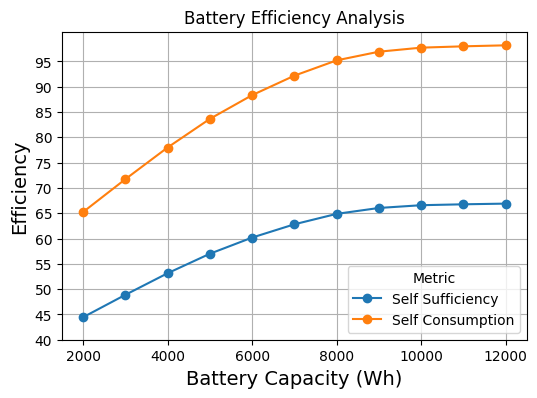

In [ ]:
# Plotting results
import matplotlib.pyplot as plt

# valid plots include "line", "bar", "barh", "hist", "box", "kde", "density", "area", "pie", "scatter", "hexbin"
#efficiency_df.plot(kind='bar', figsize=(12, 6))
#efficiency_df.plot(kind='line', figsize=(10, 5))

plt.figure(figsize=(6, 4))
plt.plot(efficiency_df.index, efficiency_df['Self Sufficiency'], marker='o', label='Self Sufficiency')
plt.plot(efficiency_df.index, efficiency_df['Self Consumption'], marker='o', label='Self Consumption')
plt.title('Battery Efficiency Analysis')
plt.xlabel('Battery Capacity (Wh)',  fontsize=14)
plt.ylabel('Efficiency',  fontsize=14)
# Set y-axis to show specific ticks
plt.yticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])
plt.legend(title='Metric')
plt.grid(True)
plt.show()

# Saving results to CSV
#efficiency_df.to_csv("battery_efficiency_results.csv")


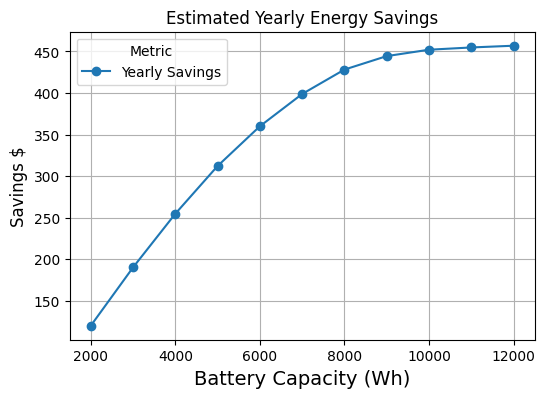

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(cost_df.index, cost_df['Savings'], marker='o', label='Yearly Savings')
plt.title('Estimated Yearly Energy Savings')
plt.xlabel('Battery Capacity (Wh)',  fontsize=14)
plt.ylabel('Savings $',  fontsize=12)
# Set y-axis to show specific ticks
#plt.yticks([40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])
plt.legend(title='Metric')
plt.grid(True)
plt.show()

# Plot SS,SC results with DR and withoutDR
Plots for the paper

In [ ]:
import matplotlib.pyplot as plt

# Define the battery capacities and efficiency data
battery_capacity = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Self Sufficiency and Consumption with Demand Response (DR)
self_sufficiency_with_dr = [56.37, 59.45, 61.86, 63.86, 65.42, 66.42, 66.88, 67.02, 66.97, 66.93, 66.84]
self_consumption_with_dr = [79.66, 83.89, 87.47, 90.61, 93.23, 95.00, 95.84, 96.12, 96.29, 96.45, 96.56]

# Self Sufficiency and Consumption without Demand Response (no DR)
self_sufficiency_no_dr = [46.09, 50.22, 54.04, 57.23, 59.76, 61.93, 63.51, 64.61, 65.08, 65.18, 65.10]
self_consumption_no_dr = [66.81, 72.47, 77.89, 82.78, 86.88, 90.31, 93.12, 94.89, 95.87, 96.18, 96.36]


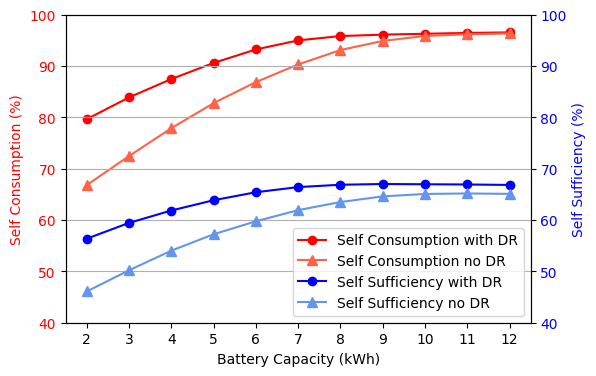

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plotting Self Consumption on the primary y-axis
ax1.plot(battery_capacity, self_consumption_with_dr, marker='o', color='red', label='Self Consumption with DR')
ax1.plot(battery_capacity, self_consumption_no_dr, marker='^', color='tomato', label='Self Consumption no DR', markersize=7)
ax1.set_xlabel('Battery Capacity (kWh)')
ax1.set_ylabel('Self Consumption (%)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_ylim(40, 100)  # Set the y-axis limits

# Create a second y-axis for the self sufficiency
ax2 = ax1.twinx()
ax2.plot(battery_capacity, self_sufficiency_with_dr, marker='o', color='blue', label='Self Sufficiency with DR')
ax2.plot(battery_capacity, self_sufficiency_no_dr, marker='^', color='cornflowerblue', label='Self Sufficiency no DR', markersize=7)
ax2.set_ylabel('Self Sufficiency (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(40, 100)  # Set the y-axis limits to be the same as ax1

# Title, grid and x-ticks
#plt.title('Sensitivity Analysis: Battery Capacity vs. Efficiency Metrics')
plt.xticks(battery_capacity)
plt.grid(True)

# Adding a legend that includes all plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

plt.show()

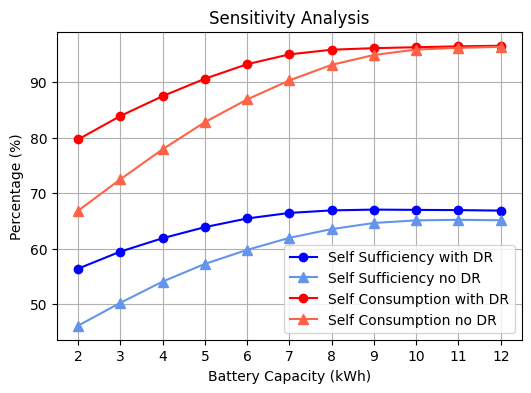

In [ ]:
plt.figure(figsize=(6, 4))

# Plotting Self Sufficiency
plt.plot(battery_capacity, self_sufficiency_with_dr, marker='o',color='blue', label='Self Sufficiency with DR')
plt.plot(battery_capacity, self_sufficiency_no_dr, marker='^', markersize=7, color='cornflowerblue', label='Self Sufficiency no DR')

# Plotting Self Consumption
plt.plot(battery_capacity, self_consumption_with_dr, marker='o', color='red', label='Self Consumption with DR')
plt.plot(battery_capacity, self_consumption_no_dr, marker='^', markersize=7, color='tomato', label='Self Consumption no DR')

# Adding labels and title
plt.title('Sensitivity Analysis')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Percentage (%)')
plt.xticks(battery_capacity)  # Ensure all capacities are marked

# Adding grid for better readability
plt.grid(True)
# Adding a legend to distinguish the lines
plt.legend()
# Show the plot
plt.show()


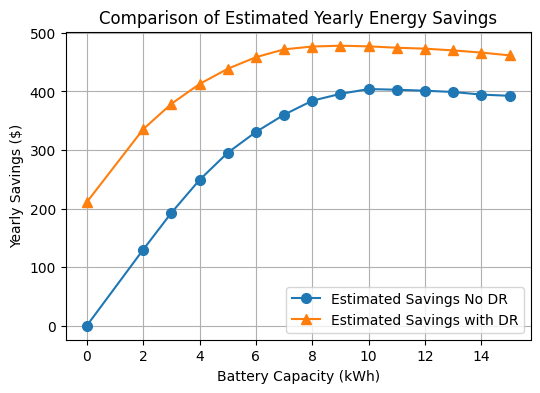

In [97]:
import matplotlib.pyplot as plt

# Data for plotting
battery_capacity = [0, 2, 3, 4,5, 6,7, 8, 9,10,11, 12, 13,14,15]

# Savings from Scenario 1
savings1 = [0.00, 129.78, 192.65, 248.87, 295.31, 330.71, 360.22, 384.09, 395.82, 404.00, 402.89, 401.19, 399.00, 394.57, 392.48]


# Savings from Scenario 2
savings2 = [210.94, 335.35, 378.71, 412.58, 438.58, 458.37, 471.77, 476.60, 477.98, 476.90, 474.55, 472.97, 469.97, 466.28, 461.56]

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(battery_capacity, savings1, marker='o', markersize=7, label='Estimated Savings No DR')
plt.plot(battery_capacity, savings2, marker='^', markersize=7, label='Estimated Savings with DR')

# Adding labels, title and legend
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Yearly Savings ($)')
plt.title('Comparison of Estimated Yearly Energy Savings')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
